# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay


# Data Collection / Dataset Creation

In [2]:
n = 500
np.random.seed(42)
df = pd.DataFrame({
    "name": [f"Person_{i}" for i in range(n)],
    "MDVP:Fo(Hz)": np.random.normal(135, 20, n),
    "MDVP:Fhi(Hz)": np.random.normal(160, 25, n),
    "MDVP:Flo(Hz)": np.random.normal(85, 10, n),
    "MDVP:Jitter(%)": np.random.normal(0.004, 0.002, n),
    "MDVP:RAP": np.random.normal(0.0025, 0.001, n),
    "spread1": np.random.normal(-6.5, 1.0, n),
    "DFA": np.random.normal(0.6, 0.05, n),
    "PPE": np.random.normal(0.3, 0.1, n),
    "status": [1]*250 + [0]*250
})


# Data Preprocessing

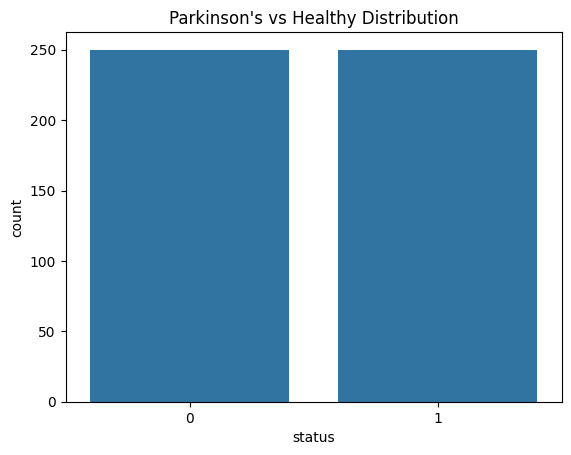

In [3]:
df.drop("name", axis=1, inplace=True)  # Drop non-numeric column

X = df.drop("status", axis=1)
y = df["status"]

sns.countplot(x=y)
plt.title("Parkinson's vs Healthy Distribution")
plt.show()


#  Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Models

In [6]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# Linear Regression
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)
lin_pred = lin.predict(X_test_scaled)

# Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
kmeans_pred = kmeans.predict(X_test_scaled)


# Evaluate Models


Logistic Regression Evaluation
Accuracy: 0.55
Confusion Matrix:
 [[27 27]
 [18 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        54
           1       0.51      0.61      0.55        46

    accuracy                           0.55       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.56      0.55      0.55       100



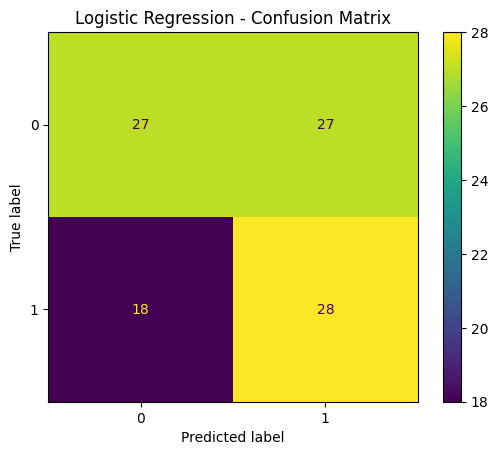


KNN Evaluation
Accuracy: 0.57
Confusion Matrix:
 [[35 19]
 [24 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62        54
           1       0.54      0.48      0.51        46

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.57      0.57      0.57       100



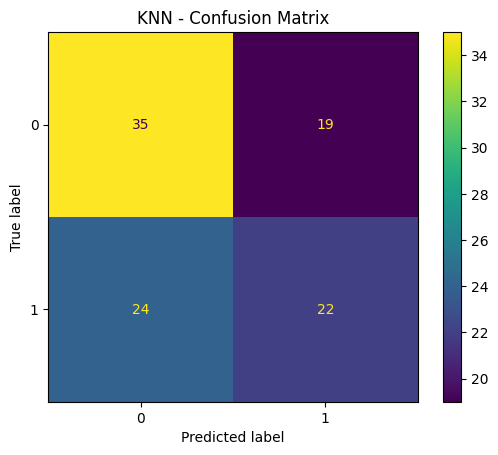


SVM Evaluation
Accuracy: 0.52
Confusion Matrix:
 [[29 25]
 [23 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55        54
           1       0.48      0.50      0.49        46

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100



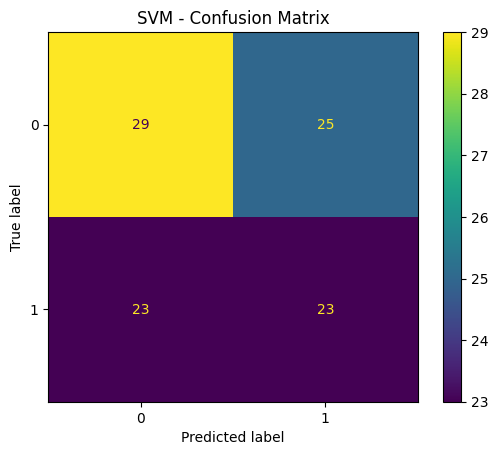


Decision Tree Evaluation
Accuracy: 0.49
Confusion Matrix:
 [[26 28]
 [23 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.48      0.50        54
           1       0.45      0.50      0.47        46

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



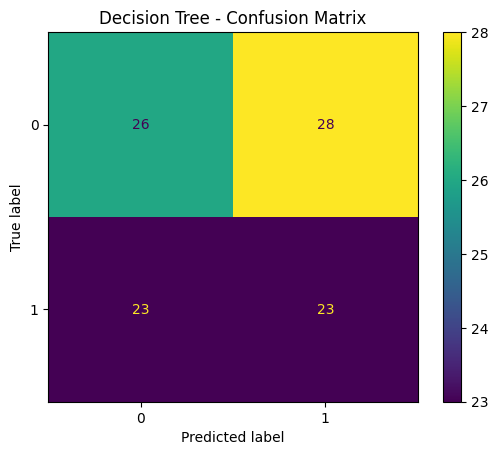

In [7]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("KNN", y_test, knn_pred)
evaluate_model("SVM", y_test, svm_pred)
evaluate_model("Decision Tree", y_test, dt_pred)


# Regression Metrics

In [8]:
print("Linear MSE:", mean_squared_error(y_test, lin_pred))
print("R2 Score:", r2_score(y_test, lin_pred))

print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))

print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("R2 Score:", r2_score(y_test, lasso_pred))


Linear MSE: 0.24667569252272048
R2 Score: 0.006941656510786931
Ridge MSE: 0.24666761977707283
R2 Score: 0.0069741554868242295
Lasso MSE: 0.25089999999999996
R2 Score: -0.010064412238325326


# Visualizations

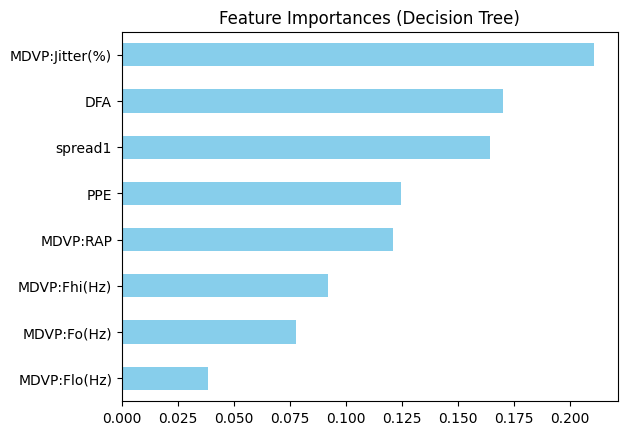

In [9]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances (Decision Tree)")
plt.show()


# Accuracy Comparison

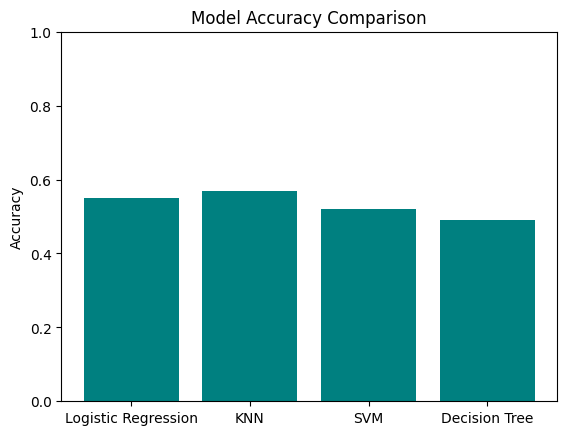

In [10]:
results = {
    "Logistic Regression": accuracy_score(y_test, log_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "SVM": accuracy_score(y_test, svm_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred)
}

plt.bar(results.keys(), results.values(), color='teal')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
